In [4]:
import os
import cv2 

1. Data Setup

In [5]:
image_dir = "./images"
images, labels = [], []

for file_name in os.listdir(image_dir):
    parts = os.path.splitext(file_name)[0].split("_")
    if len(parts) != 4 or any(p == "" for p in parts):
        continue

    age, gender, race, date = int(parts[0]), int(parts[1]), int(parts[2]), parts[3]
    if not (0 <= age <= 116 and gender in (0, 1) and 0 <= race <= 4 and len(date) == 17):
        continue

    img_path = os.path.join(image_dir, file_name)
    img = cv2.imread(img_path)

    images.append(img)
    labels.append({
        "age": age,
        "gender": gender,
        "race": race,
        "datetime": date
    })

print(len(images))

24099


2. Data Exploration & Visualisation

In [35]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

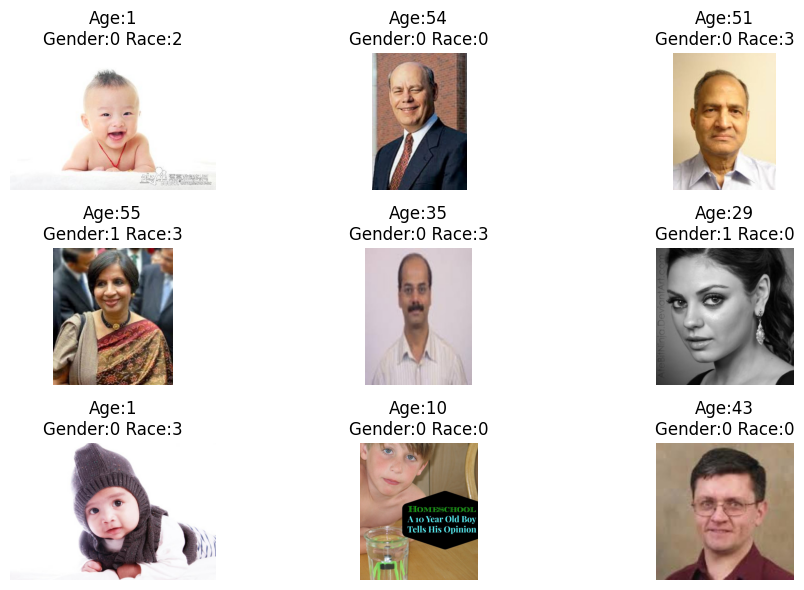

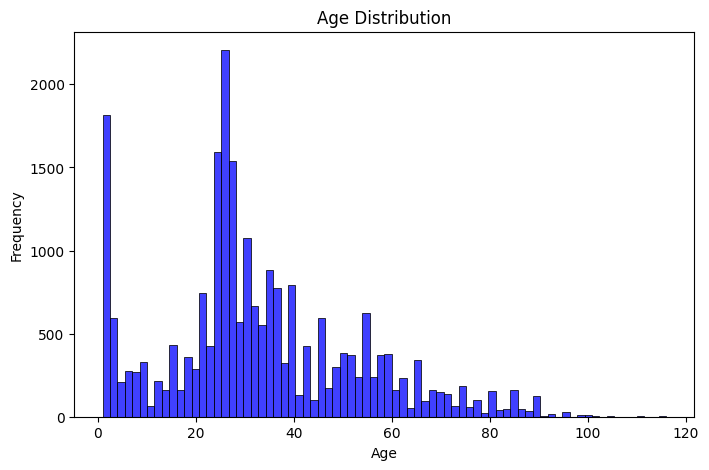

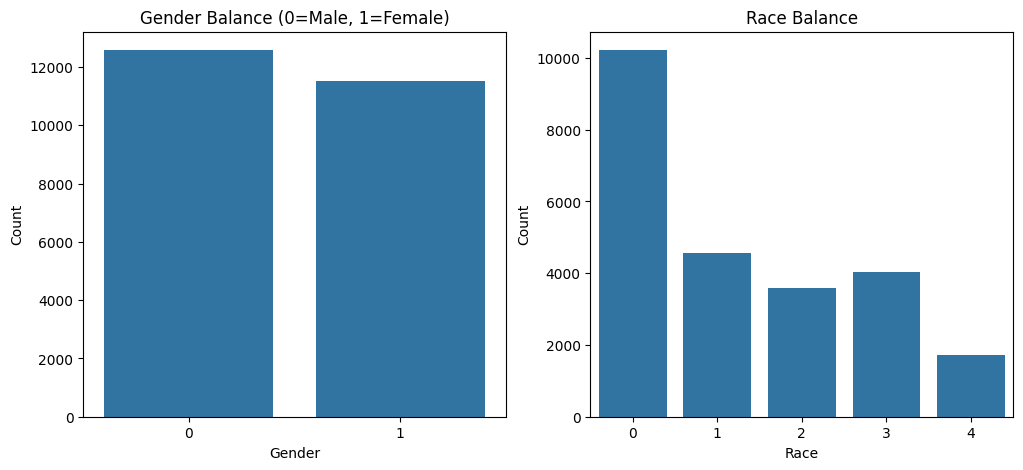

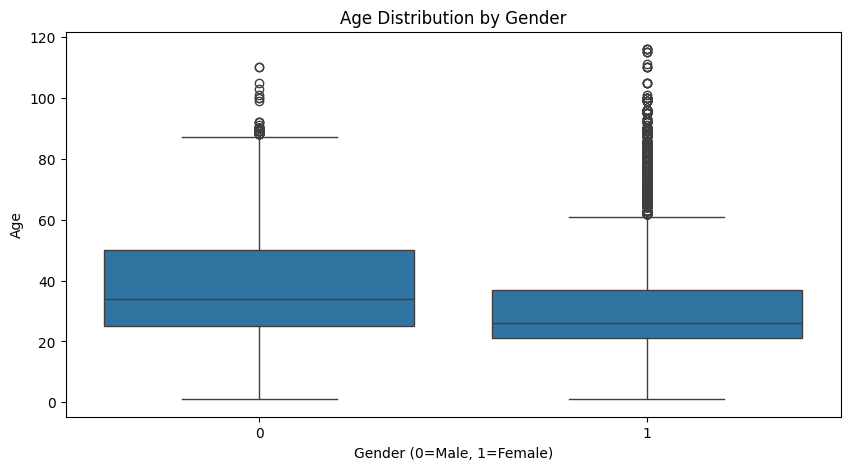

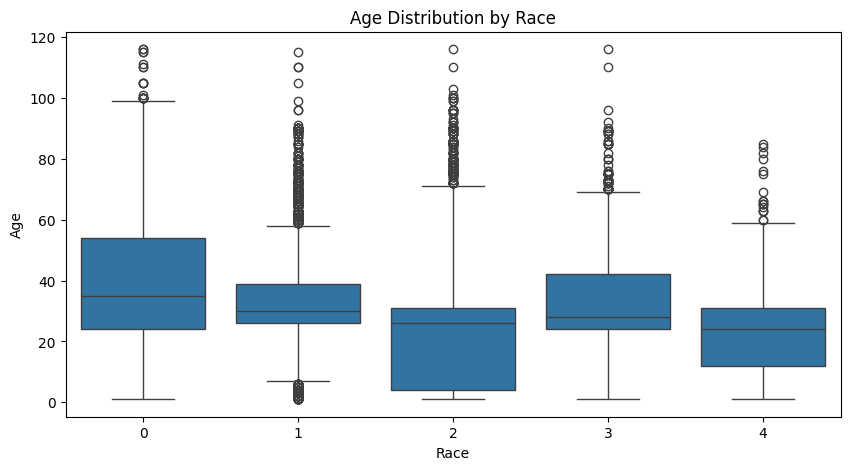

In [48]:
# Visualize random sample
plt.figure(figsize=(10, 6))
for i in range(9):  # show 9 random images
    idx = random.randint(0, len(images) - 1)
    img = images[idx]
    label = labels[idx]

    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # convert BGR -> RGB for matplotlib
    plt.axis("off")
    plt.title(f'Age:{label["age"]}\nGender:{label["gender"]} Race:{label["race"]}')
plt.tight_layout()
plt.show()

# Plot age distribution (histogram)
genders = [i["gender"] for i in labels]
races = [i["race"] for i in labels]
age_list = [i["age"] for i in labels]

plt.figure(figsize=(8, 5))
sns.histplot(age_list, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Check class balance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=genders, ax=axes[0])
axes[0].set_title("Gender Balance (0=Male, 1=Female)")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

sns.countplot(x=races, ax=axes[1])
axes[1].set_title("Race Balance")
axes[1].set_xlabel("Race")
axes[1].set_ylabel("Count")

plt.show()

# Identify potential biases (e.g., gender, ethnicity, lighting)
plt.figure(figsize=(10, 5))
sns.boxplot(x=genders, y=[i["age"] for i in labels])
plt.title("Age Distribution by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Age")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=races, y=[i["age"] for i in labels])
plt.title("Age Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.show()